In [2]:
import pandas as pd
import pyreadstat
import seaborn as sn
import matplotlib.pyplot as plt
# if you do not have pyreadstat installed you can use the following code in your terminal to install it: 
# pip install Pyreadstat


In [3]:
df, meta = pyreadstat.read_sav('W107_Aprl22/ATP W107.sav')

In [4]:
pd.options.display.max_columns = 20


df.head()


,QKEY,INTERVIEW_START_W107,INTERVIEW_END_W107,DEVICE_TYPE_W107,LANG_W107,FORM_W107,SATIS_W107,SATISFY_W107,FEEL_COUNTRY_FEAR_W107,FEEL_COUNTRY_HOPEFUL_W107,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W107
0,100260.0,2022-04-28 14:00:32,2022-04-28 14:15:57,1.0,1.0,2.0,NaN,2.0,1.0,1.0,...,NaN,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,0.393477
1,100598.0,2022-05-01 16:08:59,2022-05-01 16:44:47,1.0,1.0,2.0,NaN,1.0,1.0,1.0,...,NaN,1.0,1.0,9.0,1.0,2.0,2.0,1.0,3.0,1.041646
2,101485.0,2022-04-26 14:50:33,2022-04-30 13:07:37,2.0,1.0,1.0,2.0,NaN,1.0,2.0,...,NaN,1.0,1.0,9.0,1.0,2.0,1.0,1.0,3.0,0.177696
3,101493.0,2022-04-26 14:57:15,2022-04-26 16:01:50,2.0,1.0,1.0,2.0,NaN,1.0,2.0,...,NaN,1.0,1.0,6.0,1.0,2.0,2.0,2.0,2.0,0.138316
4,103094.0,2022-04-26 14:27:56,2022-04-26 14:37:26,2.0,1.0,2.0,NaN,2.0,1.0,1.0,...,NaN,2.0,3.0,1.0,1.0,2.0,1.0,2.0,1.0,0.760906


In [5]:
pd.options.display.max_rows= 50

question_stategood = df[['STATEGOOD_OE_CODE1_FINAL_W107','STATEGOOD_OE_CODE2_FINAL_W107','STATEGOOD_OE_CODE3_FINAL_W107','STATEBAD_OE_CODE1_FINAL_W107','STATEBAD_OE_CODE2_FINAL_W107','STATEBAD_OE_CODE3_FINAL_W107']]
question_stategood.sample()


,STATEGOOD_OE_CODE1_FINAL_W107,STATEGOOD_OE_CODE2_FINAL_W107,STATEGOOD_OE_CODE3_FINAL_W107,STATEBAD_OE_CODE1_FINAL_W107,STATEBAD_OE_CODE2_FINAL_W107,STATEBAD_OE_CODE3_FINAL_W107
4234,30.0,NaN,NaN,30.0,20.0,NaN


In [6]:
sentiments_on_nation = df[['FEEL_COUNTRY_FEAR_W107','FEEL_COUNTRY_ANGRY_W107','FEEL_COUNTRY_HOPEFUL_W107','FEEL_COUNTRY_PROUD_W107']]
sentiments_on_nation.rename(columns = {'FEEL_COUNTRY_FEAR_W107':'Fearful', 
                       'FEEL_COUNTRY_HOPEFUL_W107':'Hopeful',
                       'FEEL_COUNTRY_PROUD_W107':'Proud',
                       'FEEL_COUNTRY_ANGRY_W107': 'Angry'}, 
            inplace = True)
 
sentiments_on_nation

/var/folders/hd/20h9s38x2170nvv40fvgsxrr0000gn/T/ipykernel_16808/1369529337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiments_on_nation.rename(columns = {'FEEL_COUNTRY_FEAR_W107':'Fearful',


,Fearful,Angry,Hopeful,Proud
0,1.0,1.0,1.0,2.0
1,1.0,2.0,1.0,2.0
2,1.0,1.0,2.0,2.0
3,1.0,1.0,2.0,2.0
4,1.0,2.0,1.0,2.0
...,...,...,...,...
5069,1.0,2.0,2.0,2.0
5070,1.0,1.0,2.0,2.0
5071,1.0,1.0,2.0,2.0
5072,1.0,1.0,2.0,2.0


In the new DF created above, I took the 4 sentiments which could only be answered affirmative or not affirmative.
In this case 1.0 stands for affirmative and 2.0 stands for not affirmative.

I want to explore if the persons who are more fearful tend to be more angry or hopeful. 

In [7]:
sentiments_on_nation.corr()

,Fearful,Angry,Hopeful,Proud
Fearful,1.000000,0.544901,0.251041,0.494786
Angry,0.544901,1.000000,0.389396,0.618728
Hopeful,0.251041,0.389396,1.000000,0.421583
Proud,0.494786,0.618728,0.421583,1.000000


In this table we can see the correlation of the sentiments with each other. However, I do not think this is the correct way of representing this. 

In [8]:
sentiments_on_nation = sentiments_on_nation.replace(1.0, -1)

In [9]:
sentiments_on_nation = sentiments_on_nation.replace(2.0, 1)

In [10]:
sentiments_on_nation.corr()

,Fearful,Angry,Hopeful,Proud
Fearful,1.000000,0.543216,0.243823,0.491468
Angry,0.543216,1.000000,0.383309,0.616190
Hopeful,0.243823,0.383309,1.000000,0.418590
Proud,0.491468,0.616190,0.418590,1.000000


It seems that the corrolations stayed relatively the same so I assume this means it's not too important how this qualitiative data is encoded, whether it is in pairs of 1 and 2 or in pairs of -1 and 1

Now, let's have a look at how this looks like in a heatmat matrix plot:

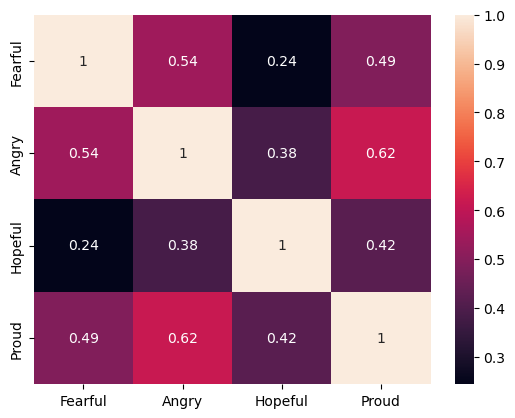

In [11]:
sn.heatmap(sentiments_on_nation.corr(), annot=True)
plt.show()

We can see in this plot some of the strongest and weakest correlations. 
- being angry is the most correlated with being proudn and fearful
- being hopeful is the least correlated with being fearful
---

Let's say we want to look only at the people who answered that they are fearful [-1]. I can look at all the relevant columns and see the amount of rows (so the amount of people who feel this way), which is 2854. To access this easily later on I will make this new DF a variable called 'fearful_ppl' (ppl being short for people)

In [12]:
fearful_ppl = sentiments_on_nation[sentiments_on_nation.Fearful == -1]
fearful_ppl

,Fearful,Angry,Hopeful,Proud
0,-1.0,-1.0,-1.0,1.0
1,-1.0,1.0,-1.0,1.0
2,-1.0,-1.0,1.0,1.0
3,-1.0,-1.0,1.0,1.0
4,-1.0,1.0,-1.0,1.0
...,...,...,...,...
5069,-1.0,1.0,1.0,1.0
5070,-1.0,-1.0,1.0,1.0
5071,-1.0,-1.0,1.0,1.0
5072,-1.0,-1.0,1.0,1.0


In [14]:
#sentiments_on_nation.hist(by =sentiments_on_nation['Fearful'])

In [17]:
pd.set_option('display.max_columns', None)
df

,QKEY,INTERVIEW_START_W107,INTERVIEW_END_W107,DEVICE_TYPE_W107,LANG_W107,FORM_W107,SATIS_W107,SATISFY_W107,FEEL_COUNTRY_FEAR_W107,FEEL_COUNTRY_HOPEFUL_W107,FEEL_COUNTRY_ANGRY_W107,FEEL_COUNTRY_PROUD_W107,USCONF_FUT_W107,GOVFEEL_W107,TRUSTFEDGOV_W107,NATPROBS_COV_W107,NATPROBS_GUN_W107,NATPROBS_INFR_W107,NATPROBS_HC_W107,NATPROBS_IMM_W107,NATPROBS_INFL_W107,NATPROBS_CLIM_W107,NATPROBS_VCRI_W107,NATPROBS_DEF_W107,NATPROBS_K12_W107,NATPROBS_RAC_W107,NATPROBS_UNEM_W107,GOVT_ROLE_W107,RELIG_GOV_W107,WORKHARD_W107,GOVPROTCT_W107,BUSPROFIT_W107,GOVAID_W107,ECONFAIR_W107,INSTFAV_FED_W107,INSTFAV_STAT_W107,INSTFAV_LOC_W107,CLRSOL_W107,FEDFREE_PROT_W107,FEDFREE_REST_W107,GOV_JOB_PUBHLT_W107,GOV_JOB_TERR_W107,GOV_JOB_ENVIR_W107,GOV_JOB_POV_W107,GOV_JOB_WKPL_W107,GOV_JOB_MED_W107,GOV_JOB_ECON_W107,GOV_JOB_DIS_W107,GOV_JOB_INFR_W107,GOV_JOB_IMM_W107,GOV_JOB_HC_W107,GOV_JOB_WRLD_W107,GOV_MAJROLE_PUBHLT_W107,GOV_MAJROLE_TERR_W107,GOV_MAJROLE_ENVIR_W107,GOV_MAJROLE_POV_W107,GOV_MAJROLE_WKPL_W107,GOV_MAJROLE_MED_W107,GOV_MAJROLE_ECON_W107,GOV_MAJROLE_DIS_W107,GOV_MAJROLE_INFR_W107,GOV_MAJROLE_IMM_W107,GOV_MAJROLE_HC_W107,GOV_MAJROLE_WRLD_W107,USASOLVE_W107,CIVIC_ENG_ACT_CONTOFF_W107,CIVIC_ENG_ACT_MEETING_W107,CIVIC_ENG_ACT_CONTAGC_W107,GOVTRAIT_ORD_W107,GOVTRAIT_MON_W107,GOVTRAIT_INTR_W107,GOVTRAIT_UNF_W107,GOVTRAIT_ADPT_W107,FEDGOVVIEWS_PAY_W107,FEDGOVVIEWS_DIFF_W107,FEDGOVVIEWS_AGCY_W107,FEDGOVVIEWS_CRED_W107,RUNFOROFF_COMM_W107,RUNFOROFF_PERS_W107,AVOID3_W107,GROUP_FED_HI_W107,GROUP_FED_MID_W107,GROUP_FED_LOW_W107,GROUP_FED_CHI_W107,GROUP_FED_RET_W107,GROUP_FED_URB_W107,GROUP_FED_RUR_W107,GROUP_FED_SBRB_W107,GROUP_FED_PAR_W107,GROUP_FED_DABL_W107,GROUP_FED_YOU_W107,GROUP_FED_PAROE1_FINAL_W107,GROUP_FED_PAROE2_FINAL_W107,GROUP_FED_PAROE3_FINAL_W107,GROUP_FED_CHIOE1_FINAL_W107,GROUP_FED_CHIOE2_FINAL_W107,GROUP_FED_CHIOE3_FINAL_W107,CONF2_a_W107,CONF2_b_W107,FEDSTATE_STAT_W107,FEDSTATE_FED_W107,FEDSTATE_RGHT_W107,CNTCT_RE_W107,FEDGOOD_OE_CODE1_FINAL_W107,FEDGOOD_OE_CODE2_FINAL_W107,FEDGOOD_OE_CODE3_FINAL_W107,FEDBAD_OE_CODE1_FINAL_W107,FEDBAD_OE_CODE2_FINAL_W107,FEDBAD_OE_CODE3_FINAL_W107,STATEGOOD_OE_CODE1_FINAL_W107,STATEGOOD_OE_CODE2_FINAL_W107,STATEGOOD_OE_CODE3_FINAL_W107,STATEBAD_OE_CODE1_FINAL_W107,STATEBAD_OE_CODE2_FINAL_W107,STATEBAD_OE_CODE3_FINAL_W107,UKRFOL_W107,JB_RUSUKR_APP_W107,UA_APPDIS_a_W107,UA_APPDIS_b_W107,UA_APPDIS_c_W107,UKR_SPRT_W107,UA_CONC_a_W107,UA_CONC_b_W107,UA_CONC_c_W107,UA_CONC_d_W107,CANCUL1_W107,CANCUL2_W107,TC5_W107,TC6b_W107,SM7_W107,F_METRO,F_CREGION,F_CDIVISION,F_AGECAT,F_GENDER,F_EDUCCAT,F_EDUCCAT2,F_HISP,F_HISP_ORIGIN,F_YEARSINUS,F_RACECMB,F_RACETHNMOD,F_CITIZEN,F_BIRTHPLACE,F_MARITAL,F_RELIG,F_BORN,F_RELIGCAT1,F_ATTEND,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W107
0,1.002600e+05,2022-04-28 14:00:32,2022-04-28 14:15:57,1.0,1.0,2.0,NaN,2.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,1.0,4.0,2.0,2.0,2.0,1.0,NaN,NaN,1.0,2.0,4.0,4.0,4.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.0,5.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,70.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,39.0,NaN,NaN,3.0,4.0,4.0,4.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,4.0,9.0,4.0,1.0,1.0,5.0,2.0,NaN,1.0,1.0,1.0,1.0,1.0,6.0,12.0,NaN,3.0,5.0,1.0,NaN,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,0.393477
1,1.005980e+05,2022-05-01 16:08:59,2022-05-01 16:44:47,1.0,1.0,2.0,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,NaN,NaN,2.0,2.0,3.0,2.0,2.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,2.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0

In [29]:
df[df.USCONF_FUT_W107 < 5]

,QKEY,INTERVIEW_START_W107,INTERVIEW_END_W107,DEVICE_TYPE_W107,LANG_W107,FORM_W107,SATIS_W107,SATISFY_W107,FEEL_COUNTRY_FEAR_W107,FEEL_COUNTRY_HOPEFUL_W107,FEEL_COUNTRY_ANGRY_W107,FEEL_COUNTRY_PROUD_W107,USCONF_FUT_W107,GOVFEEL_W107,TRUSTFEDGOV_W107,NATPROBS_COV_W107,NATPROBS_GUN_W107,NATPROBS_INFR_W107,NATPROBS_HC_W107,NATPROBS_IMM_W107,NATPROBS_INFL_W107,NATPROBS_CLIM_W107,NATPROBS_VCRI_W107,NATPROBS_DEF_W107,NATPROBS_K12_W107,NATPROBS_RAC_W107,NATPROBS_UNEM_W107,GOVT_ROLE_W107,RELIG_GOV_W107,WORKHARD_W107,GOVPROTCT_W107,BUSPROFIT_W107,GOVAID_W107,ECONFAIR_W107,INSTFAV_FED_W107,INSTFAV_STAT_W107,INSTFAV_LOC_W107,CLRSOL_W107,FEDFREE_PROT_W107,FEDFREE_REST_W107,GOV_JOB_PUBHLT_W107,GOV_JOB_TERR_W107,GOV_JOB_ENVIR_W107,GOV_JOB_POV_W107,GOV_JOB_WKPL_W107,GOV_JOB_MED_W107,GOV_JOB_ECON_W107,GOV_JOB_DIS_W107,GOV_JOB_INFR_W107,GOV_JOB_IMM_W107,GOV_JOB_HC_W107,GOV_JOB_WRLD_W107,GOV_MAJROLE_PUBHLT_W107,GOV_MAJROLE_TERR_W107,GOV_MAJROLE_ENVIR_W107,GOV_MAJROLE_POV_W107,GOV_MAJROLE_WKPL_W107,GOV_MAJROLE_MED_W107,GOV_MAJROLE_ECON_W107,GOV_MAJROLE_DIS_W107,GOV_MAJROLE_INFR_W107,GOV_MAJROLE_IMM_W107,GOV_MAJROLE_HC_W107,GOV_MAJROLE_WRLD_W107,USASOLVE_W107,CIVIC_ENG_ACT_CONTOFF_W107,CIVIC_ENG_ACT_MEETING_W107,CIVIC_ENG_ACT_CONTAGC_W107,GOVTRAIT_ORD_W107,GOVTRAIT_MON_W107,GOVTRAIT_INTR_W107,GOVTRAIT_UNF_W107,GOVTRAIT_ADPT_W107,FEDGOVVIEWS_PAY_W107,FEDGOVVIEWS_DIFF_W107,FEDGOVVIEWS_AGCY_W107,FEDGOVVIEWS_CRED_W107,RUNFOROFF_COMM_W107,RUNFOROFF_PERS_W107,AVOID3_W107,GROUP_FED_HI_W107,GROUP_FED_MID_W107,GROUP_FED_LOW_W107,GROUP_FED_CHI_W107,GROUP_FED_RET_W107,GROUP_FED_URB_W107,GROUP_FED_RUR_W107,GROUP_FED_SBRB_W107,GROUP_FED_PAR_W107,GROUP_FED_DABL_W107,GROUP_FED_YOU_W107,GROUP_FED_PAROE1_FINAL_W107,GROUP_FED_PAROE2_FINAL_W107,GROUP_FED_PAROE3_FINAL_W107,GROUP_FED_CHIOE1_FINAL_W107,GROUP_FED_CHIOE2_FINAL_W107,GROUP_FED_CHIOE3_FINAL_W107,CONF2_a_W107,CONF2_b_W107,FEDSTATE_STAT_W107,FEDSTATE_FED_W107,FEDSTATE_RGHT_W107,CNTCT_RE_W107,FEDGOOD_OE_CODE1_FINAL_W107,FEDGOOD_OE_CODE2_FINAL_W107,FEDGOOD_OE_CODE3_FINAL_W107,FEDBAD_OE_CODE1_FINAL_W107,FEDBAD_OE_CODE2_FINAL_W107,FEDBAD_OE_CODE3_FINAL_W107,STATEGOOD_OE_CODE1_FINAL_W107,STATEGOOD_OE_CODE2_FINAL_W107,STATEGOOD_OE_CODE3_FINAL_W107,STATEBAD_OE_CODE1_FINAL_W107,STATEBAD_OE_CODE2_FINAL_W107,STATEBAD_OE_CODE3_FINAL_W107,UKRFOL_W107,JB_RUSUKR_APP_W107,UA_APPDIS_a_W107,UA_APPDIS_b_W107,UA_APPDIS_c_W107,UKR_SPRT_W107,UA_CONC_a_W107,UA_CONC_b_W107,UA_CONC_c_W107,UA_CONC_d_W107,CANCUL1_W107,CANCUL2_W107,TC5_W107,TC6b_W107,SM7_W107,F_METRO,F_CREGION,F_CDIVISION,F_AGECAT,F_GENDER,F_EDUCCAT,F_EDUCCAT2,F_HISP,F_HISP_ORIGIN,F_YEARSINUS,F_RACECMB,F_RACETHNMOD,F_CITIZEN,F_BIRTHPLACE,F_MARITAL,F_RELIG,F_BORN,F_RELIGCAT1,F_ATTEND,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W107
0,1.002600e+05,2022-04-28 14:00:32,2022-04-28 14:15:57,1.0,1.0,2.0,NaN,2.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,1.0,4.0,2.0,2.0,2.0,1.0,NaN,NaN,1.0,2.0,4.0,4.0,4.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.0,5.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,70.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,39.0,NaN,NaN,3.0,4.0,4.0,4.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,4.0,9.0,4.0,1.0,1.0,5.0,2.0,NaN,1.0,1.0,1.0,1.0,1.0,6.0,12.0,NaN,3.0,5.0,1.0,NaN,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,0.393477
1,1.005980e+05,2022-05-01 16:08:59,2022-05-01 16:44:47,1.0,1.0,2.0,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,NaN,NaN,2.0,2.0,3.0,2.0,2.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,2.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0

This shows all the participants who answered the question "How much confidence do you have in the future of the United States?". Participants that did not answer/skipped this question have the value of '99.00', which is why I am filtering them to be smaller than 5. There are four options for answering the question:
- 1 : Quite a lot
- 2 : Some
- 3 : Very little
- 4 : None at all

Further ideas for analysis: 
- exploration of themes that fearful versus non-fearful people are most concerned about. Topics include climate change, inflation, immigration, gun violance and other topics. It would be interesting to see if there if people saying that there are fearful of the state of the nation generally have more topics of concern and also indicate higher degrees of concerns on these topics.